# 1 Using a Tagger
- A part-of-speech tagger, or POS-tagger, processes a sequence of words, and attaches a part of speech tag to each word

In [1]:
import nltk
from nltk import word_tokenize
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [2]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

- Lexical categories like "noun" and part-of-speech tags like NN seem to have their uses, but the details will be obscure to many readers
- Many of these categories arise from superficial analysis the distribution of words in text

In [3]:
# The text.similar() method takes a word w, 
# finds all words w' that appear in the same context
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [4]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [5]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [6]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


# 2.1 Representing Tagged Tokens
- A tagged token is represented using a tuple consisting of the token and the tag

In [7]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [8]:
# tokenize the string to access the individual word/tag strings
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''

print([nltk.tag.str2tuple(t) for t in sent.split()])

[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), ('``', '``'), ('ARE', 'BER'), ('well', 'QL'), ('operated', 'VBN'), ('and', 'CC'), ('follow', 'VB'), ('generally', 'RB'), ('accepted', 'VBN'), ('practices', 'NNS'), ('which', 'WDT'), ('inure', 'VB'), ('to', 'IN'), ('the', 'AT'), ('best', 'JJT'), ('interest', 'NN'), ('of', 'IN'), ('both', 'ABX'), ('governments', 'NNS'), ("''", "''"), ('.', '.')]


# 2.3 A Universal Part-of-Speech Tagset

In [9]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

# 2.4 Nouns
- Nouns generally refer to people, places, things, or concepts

In [10]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

# 2.5 Verbs
- Verbs are words that describe events and actions

In [11]:
# sort all the verbs by frequency
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
verbs = [wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

print(len(verbs))
print(verbs[:10])

2633
['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would']


In [12]:
# items being counted in the frequency distribution are word-tag pairs
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [13]:
# reverse the order of the pairs, so that the tags are the conditions, and the words are the events
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)

list(cfd2['VBN'])[:10]

['named',
 'used',
 'caused',
 'exposed',
 'reported',
 'replaced',
 'sold',
 'died',
 'expected',
 'diagnosed']

In [14]:
# find words which can be both VBD and VBN
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]

[]

In [15]:
idx1 = wsj.index(('kicked', 'VBD'))
wsj[idx1-4:idx1+1]

[('While', 'IN'),
 ('program', 'NN'),
 ('trades', 'NNS'),
 ('swiftly', 'RB'),
 ('kicked', 'VBD')]

In [16]:
idx2 = wsj.index(('kicked', 'VBN'))
wsj[idx2-4:idx2+1]

[('head', 'NN'),
 ('of', 'IN'),
 ('state', 'NN'),
 ('has', 'VBZ'),
 ('kicked', 'VBN')]

# 2.6 Adjectives and Adverbs
- Adjectives describe nouns, and can be used as modifiers
- Adverbs modify verbs to specify the time, manner, place or direction of the event described by the verb

# 2.7 Unsimplified Tags
- $ for possessive nouns
- S for plural nouns
- P for proper nouns
- -NC for citations
- -HL for words in headlines 
- -TL for titles

In [17]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())


tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

# 2.8 Exploring Tagged Corpora

In [18]:
# Suppose we're studying the word often and want to see how it is used in text
brown_learned_text = brown.words(categories='learned')
print(sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often')))

[',', '.', 'accomplished', 'analytically', 'appear', 'apt', 'associated', 'assuming', 'became', 'become', 'been', 'began', 'call', 'called', 'carefully', 'chose', 'classified', 'colorful', 'composed', 'contain', 'differed', 'difficult', 'encountered', 'enough', 'equate', 'extremely', 'found', 'happens', 'have', 'ignored', 'in', 'involved', 'more', 'needed', 'nightly', 'observed', 'of', 'on', 'out', 'quite', 'represent', 'responsible', 'revamped', 'seclude', 'set', 'shortened', 'sing', 'sounded', 'stated', 'still', 'sung', 'supported', 'than', 'to', 'when', 'work']


In [19]:
# tagged_words() method to look at the part-of-speech tag
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [20]:
# find words involving particular sequences of tags and words (in this case "<Verb> to <Verb>")
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

## The print is long
# for tagged_sent in brown.tagged_sents():
#     process(tagged_sent)

# 3.6 Complex Keys and Values

In [21]:
from collections import defaultdict

pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
# brown_news_tagged

for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
#     print((w1, t1), (w2, t2))
    pos[(t1, w2)][t2] += 1

# pos
pos[('NOUN', 'Grand')]

defaultdict(int, {'ADJ': 1, 'X': 1})

# 3.7 Inverting a Dictionary
- If d is a dictionary and k is a key, we type d[k] and immediately obtain the value. 
- Finding a key given a value is slower and more cumbersome
- We just get all the key-value pairs in the dictionary, and create a new dictionary of value-key pairs

In [22]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}
pos2 = dict((value, key) for (key, value) in pos.items())
pos2

{'ADJ': 'colorless', 'ADV': 'furiously', 'N': 'ideas', 'V': 'sleep'}

In [23]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})
pos2 = defaultdict(list)
for key, value in pos.items():
    pos2[value].append(key)

pos2

defaultdict(list,
            {'ADJ': ['colorless', 'old'],
             'ADV': ['furiously', 'peacefully'],
             'N': ['ideas', 'cats'],
             'V': ['sleep', 'scratch']})

In [24]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())
pos2

Index(list,
      {'ADJ': ['colorless', 'old'],
       'ADV': ['furiously', 'peacefully'],
       'N': ['ideas', 'cats'],
       'V': ['sleep', 'scratch']})

# 4.1 The Default Tagger
- The simplest possible tagger assigns the same tag to each token

In [25]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

# Find the most frequent tag
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [26]:
# create a tagger that tags everything as NN
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
print(default_tagger.tag(tokens))

[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN'), ('!', 'NN')]


In [27]:
# 13% of tokens tagged correctly
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

# 4.2 The Regular Expression Tagger
- The regular expression tagger assigns tags to tokens on the basis of matching patterns

In [28]:
patterns = [
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'.*ould$', 'MD'),               # modals
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                     # nouns (default)
]

regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown_sents[3]))

[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]


In [29]:
# 20% of tokens tagged correctly
regexp_tagger.evaluate(brown_tagged_sents)

0.20326391789486245

# 4.3 The Lookup Tagger
1. Let's find the hundred most frequent words and store their most likely tag. 
2. We can then use this information as the model for a "lookup tagger"

In [30]:
# Point 1
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)

# Point 2
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)

# 46% of tokens tagged correctly
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

In [31]:
"""
Many words have been assigned a tag of None, 
because they were not among the 100 most frequent words
"""
sent = brown.sents(categories='news')[3]
print(baseline_tagger.tag(sent))

[('``', '``'), ('Only', None), ('a', 'AT'), ('relative', None), ('handful', None), ('of', 'IN'), ('such', None), ('reports', None), ('was', 'BEDZ'), ('received', None), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', None), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', None), ('the', 'AT'), ('widespread', None), ('interest', None), ('in', 'IN'), ('the', 'AT'), ('election', None), (',', ','), ('the', 'AT'), ('number', None), ('of', 'IN'), ('voters', None), ('and', 'CC'), ('the', 'AT'), ('size', None), ('of', 'IN'), ('this', 'DT'), ('city', None), ("''", "''"), ('.', '.')]


In [32]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

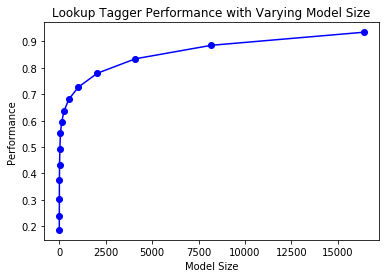

In [33]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

display()

# 5.1 Unigram Tagging
A unigram tagger behaves just like a lookup tagger, except there is a more convenient technique for setting it up, called training

In [34]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
print(unigram_tagger.tag(brown_sents[2007]))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'QL'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]


In [35]:
# 93% of tokens tagged correctly
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

# 5.2 Separating the Training and Testing Data
- Split the data, training on 90% and testing on the remaining 10%

In [36]:
size = int(len(brown_tagged_sents) * 0.9)
size

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)

# 81% of tokens tagged correctly
unigram_tagger.evaluate(test_sents)

0.8121200039868434

# 5.3 General N-Gram Tagging
- An n-gram tagger is a generalization of a unigram tagger whose context is the current word together with the part-of-speech tags of the n-1 preceding tokens
- An n-gram tagger picks the tag that is most likely in the given context

![Image](http://www.nltk.org/images/tag-context.png)

In [37]:
# Training data
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

# Testing data
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

# 10% of tokens tagged correctly
bigram_tagger.evaluate(test_sents)

0.10206319146815508

# 5.4 Combining Taggers
1. Try tagging the token with the bigram tagger.
2. If the bigram tagger is unable to find a tag for the token, try the unigram tagger.
3. If the unigram tagger is also unable to find a tag, use a default tagger.

In [38]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

# 84% of tokens tagged correctly
t2.evaluate(test_sents)

0.8452108043456593

# 5.6 Storing Taggers
- Convenient to save a trained tagger in a file for later re-use

In [39]:
# save our tagger t2 to a file t2.pkl
from pickle import dump
output = open('t2.pkl', 'wb')
dump(t2, output, -1)
output.close()

In [40]:
# load our saved tagger
from pickle import load
input = open('t2.pkl', 'rb')
tagger = load(input)
input.close()

In [41]:
text = """The board's action shows what free enterprise
    is up against in our complex maze of regulatory laws ."""
tokens = text.split()
print(tagger.tag(tokens))

[('The', 'AT'), ("board's", 'NN$'), ('action', 'NN'), ('shows', 'NNS'), ('what', 'WDT'), ('free', 'JJ'), ('enterprise', 'NN'), ('is', 'BEZ'), ('up', 'RP'), ('against', 'IN'), ('in', 'IN'), ('our', 'PP$'), ('complex', 'JJ'), ('maze', 'NN'), ('of', 'IN'), ('regulatory', 'NN'), ('laws', 'NNS'), ('.', '.')]


# 8 Summary
- Words can be grouped into classes, such as nouns, verbs, adjectives, and adverbs. These classes are known as lexical categories or parts of speech. Parts of speech are assigned short labels, or tags, such as NN, VB,
- The process of automatically assigning parts of speech to words in text is called part-of-speech tagging, POS tagging, or just tagging.
- Automatic tagging is an important step in the NLP pipeline, and is useful in a variety of situations including: predicting the behavior of previously unseen words, analyzing word usage in corpora, and text-to-speech systems.
- Some linguistic corpora, such as the Brown Corpus, have been POS tagged.
- A variety of tagging methods are possible, e.g. default tagger, regular expression tagger, unigram tagger and n-gram taggers. These can be combined using a technique known as backoff.
- Taggers can be trained and evaluated using tagged corpora.
- Backoff is a method for combining models: when a more specialized model (such as a bigram tagger) cannot assign a tag in a given context, we backoff to a more general model (such as a unigram tagger).
- Part-of-speech tagging is an important, early example of a sequence classification task in NLP: a classification decision at any one point in the sequence makes use of words and tags in the local context.
- A dictionary is used to map between arbitrary types of information, such as a string and a number: freq['cat'] = 12. We create dictionaries using the brace notation: pos = {}, pos = {'furiously': 'adv', 'ideas': 'n', 'colorless': 'adj'}.
- N-gram taggers can be defined for large values of n, but once n is larger than 3 we usually encounter the sparse data problem; even with a large quantity of training data we only see a tiny fraction of possible contexts.
- Transformation-based tagging involves learning a series of repair rules of the form "change tag s to tag t in context c", where each rule fixes mistakes and possibly introduces a (smaller) number of errors.